<a href="https://colab.research.google.com/github/sumanapalle065/LC25000-Hybrid-Architecture-using-DL/blob/main/LC25000_Hybrid_Arc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import necessary libraries

import tensorflow as lc2k_tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as lc2k_plt
import os
import zipfile

In [4]:
zip_path = '/content/drive/MyDrive/LC25000.zip'

# Define a target directory to unzip the contents
extract_path = '/content/drive/MyDrive/dataset/LC25000'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
# List the image files in each folder
colon_aca_folder = os.path.join(extract_path, 'lung_colon_image_set', 'colon_image_sets', 'colon_aca')
colon_n_folder = os.path.join(extract_path, 'lung_colon_image_set', 'colon_image_sets', 'colon_n')
lung_aca_folder = os.path.join(extract_path, 'lung_colon_image_set', 'lung_image_sets', 'lung_aca')
lung_scc_folder = os.path.join(extract_path, 'lung_colon_image_set', 'lung_image_sets', 'lung_scc')
lung_n_folder = os.path.join(extract_path, 'lung_colon_image_set', 'lung_image_sets', 'lung_n')

colon_aca_files = os.listdir(colon_aca_folder)
colon_n_files = os.listdir(colon_n_folder)
lung_aca_files = os.listdir(lung_aca_folder)
lung_scc_files = os.listdir(lung_scc_folder)
lung_n_files = os.listdir(lung_n_folder)

# Print the first 5 images from each folder to verify
print("Colon ACA Images:", colon_aca_files[:5])
print("Colon N Images:", colon_n_files[:5])
print("Lung ACA Images:", lung_aca_files[:5])
print("Lung SCC Images:", lung_scc_files[:5])
print("Lung N Images:", lung_n_files[:5])


Colon ACA Images: ['colonca1.jpeg', 'colonca10.jpeg', 'colonca100.jpeg', 'colonca1000.jpeg', 'colonca1001.jpeg']
Colon N Images: ['colonn1.jpeg', 'colonn10.jpeg', 'colonn100.jpeg', 'colonn1000.jpeg', 'colonn1001.jpeg']
Lung ACA Images: ['lungaca1.jpeg', 'lungaca10.jpeg', 'lungaca100.jpeg', 'lungaca1000.jpeg', 'lungaca1001.jpeg']
Lung SCC Images: ['lungscc1.jpeg', 'lungscc10.jpeg', 'lungscc100.jpeg', 'lungscc1000.jpeg', 'lungscc1001.jpeg']
Lung N Images: ['lungn1.jpeg', 'lungn10.jpeg', 'lungn100.jpeg', 'lungn1000.jpeg', 'lungn1001.jpeg']


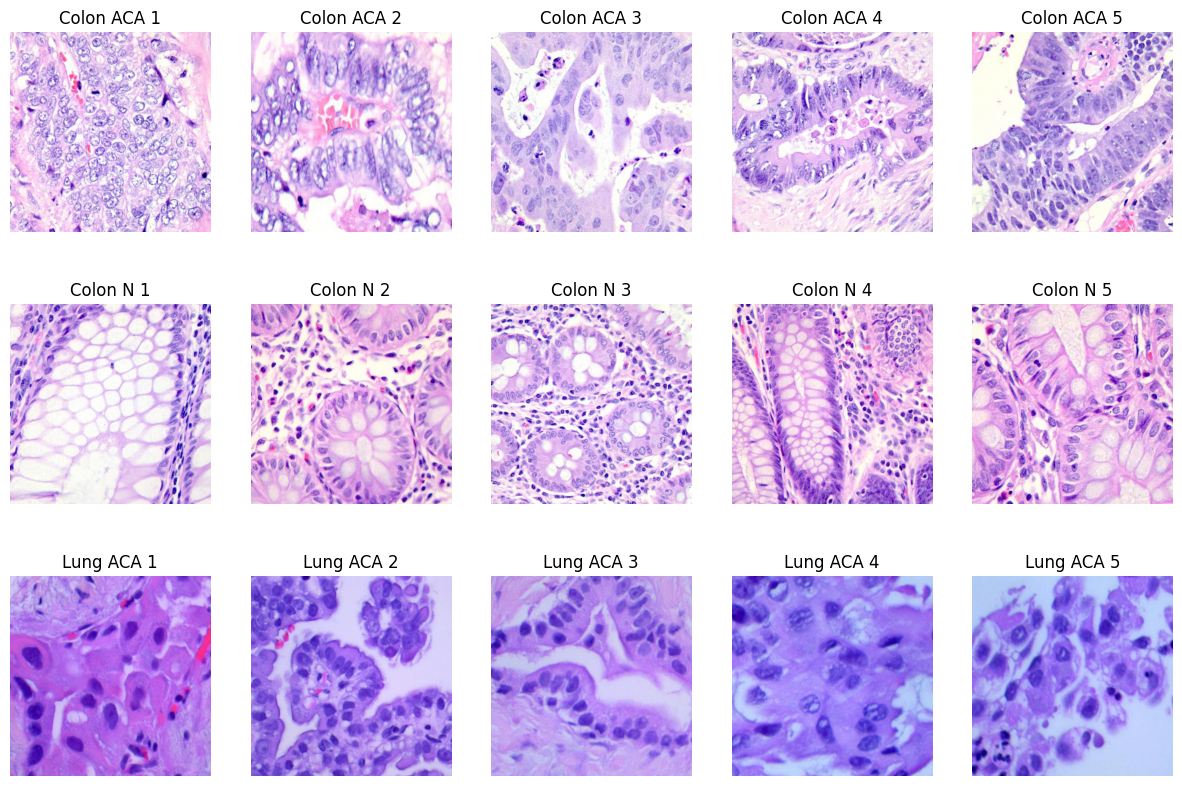

In [6]:
# Display a few images from each subfolder
import matplotlib.pyplot as plt
import cv2  # OpenCV for loading images

# Number of images to display from each folder
num_images_to_display = 5
plt.figure(figsize=(15, 10))

# Display images from the 'colon_aca' folder
for i, image_file in enumerate(colon_aca_files[:num_images_to_display]):
    image_path = os.path.join(colon_aca_folder, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Plot the colon_aca image
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Colon ACA {i+1}")

# Display images from the 'colon_n' folder
for i, image_file in enumerate(colon_n_files[:num_images_to_display]):
    image_path = os.path.join(colon_n_folder, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Plot the colon_n image
    plt.subplot(3, num_images_to_display, i + num_images_to_display + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Colon N {i+1}")

# Display images from the 'lung_aca' folder
for i, image_file in enumerate(lung_aca_files[:num_images_to_display]):
    image_path = os.path.join(lung_aca_folder, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Plot the lung_aca image
    plt.subplot(3, num_images_to_display, i + 2*num_images_to_display + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Lung ACA {i+1}")

plt.show()


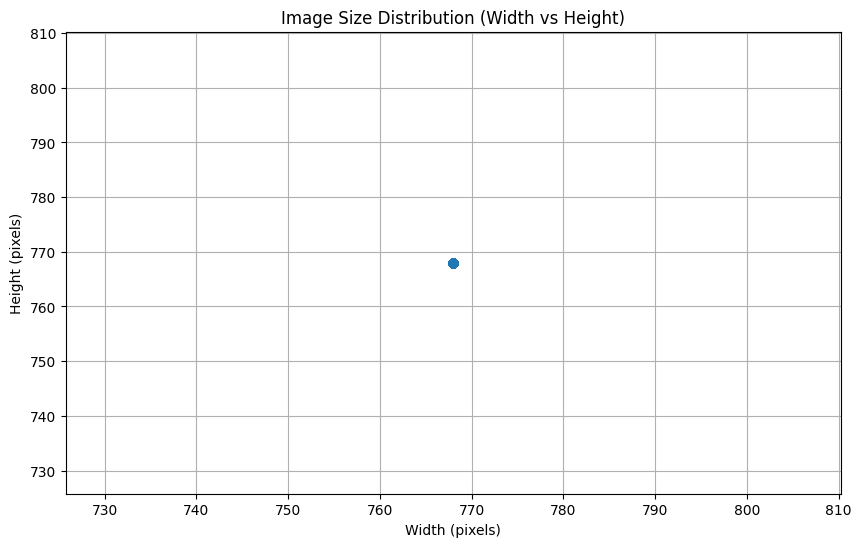

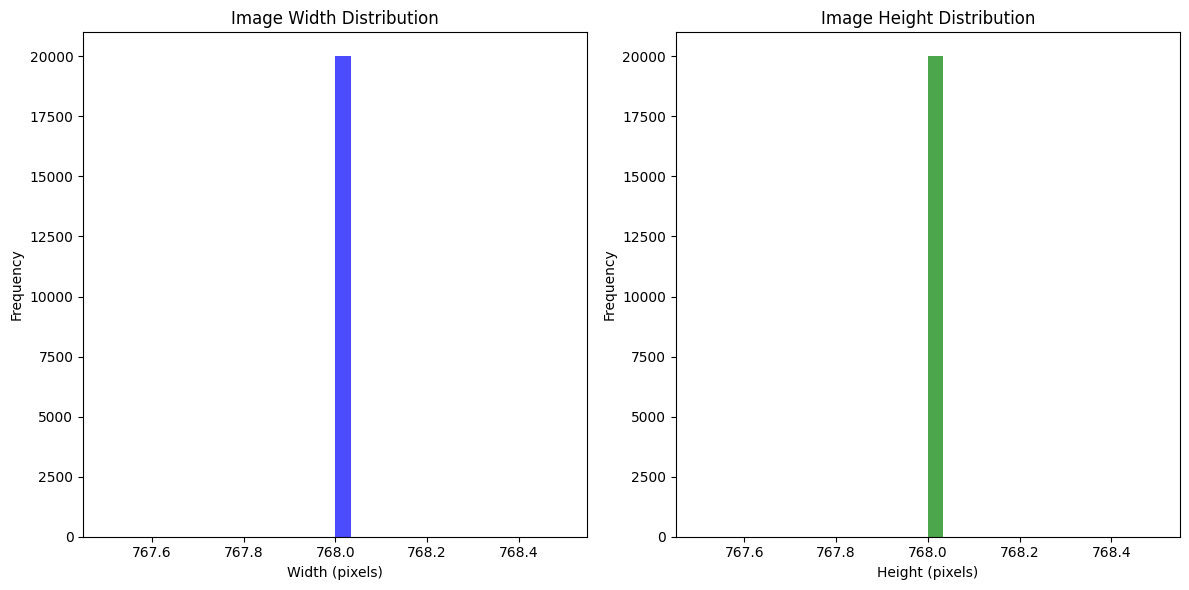

In [8]:
import cv2
import matplotlib.pyplot as plt
import os

# Initialize lists to store the image dimensions
image_heights = []
image_widths = []

# Define all folders in the dataset that you want to analyze
folders_to_analyze = [
    colon_aca_folder,
    colon_n_folder,
    lung_aca_folder,
    lung_n_folder
]

# Loop through each folder and extract the dimensions of the images
for folder in folders_to_analyze:
    for image_file in os.listdir(folder):
        image_path = os.path.join(folder, image_file)

        # Read the image using OpenCV
        img = cv2.imread(image_path)

        if img is not None:  # Check if the image is read successfully
            height, width, _ = img.shape  # Get height, width, and channels
            image_heights.append(height)
            image_widths.append(width)

# Plotting the distribution of image sizes (width vs height)
plt.figure(figsize=(10, 6))

# Scatter plot for Width vs Height
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title('Image Size Distribution (Width vs Height)')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()

# Plotting histograms of image widths and heights
plt.figure(figsize=(12, 6))

# Histogram for image widths
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=30, color='blue', alpha=0.7)
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

# Histogram for image heights
plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=30, color='green', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The above plots show that all the images in the dataset are of the same size.

In [11]:
# Normalize images
img = img.astype('float32') / 255.0  # Scale pixel values to [0, 1]

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)